# Planet Finder

## Task description

Band spectra is the name given to groups of lines so closely spaced that each group appears to be a band, e.g. nitrogen spectrum. Band spectra, or molecular spectra, are produced by molecules radiating their rotational or vibrational energies, or both simultaneously.

**Astronomical spectroscopy** is the study of astronomy using the techniques of spectroscopy to measure the spectrum of electromagnetic radiation, including visible light and radio, which radiates from stars and other celestial objects. A **stellar spectrumcan** reveal many properties of stars, such as their chemical composition, temperature, density, mass, distance, luminosity, and relative motion using Doppler shift measurements. **Spectroscopy** is also used to study the physical properties of many other types of celestial objects such as planets, nebulae, galaxies, and active galactic nuclei.

In an astronomical observation, researchers used 17 different bands of the spectrum to analyze 4 celestial objects. Using the PCA (Principal component analysis) find out which of the 4 celestial objects does not behave like a star.

| Band | Object 1 | Object 2 | Object 3 | Object 4 |
|:---:| ---:| ---:| ---:| ---:|
| 1 | 375 | 135 | 458 | 475 |
| 2 | 57 | 47 | 53 | 73 |
| 3 | 245 | 267 | 242 | 227 |
| 4 | 1472 | 1494 | 1462 | 1582 |
| 5 | 105 | 66 | 103 | 103 |
| 6 | 54 | 41 | 62 | 64 |
| 7 | 193 | 209 | 184 | 235 |
| 8 | 147 | 93 | 122 | 160 |
| 9 | 1102 | 674 | 957 | 1137 |
| 10 | 720 | 1033 | 566 | 874 |
| 11 | 253 | 143 | 171 | 265 |
| 12 | 685 | 586 | 750 | 803 |
| 13 | 488 | 355 | 418 | 570 |
| 14 | 198 | 187 | 220 | 203 |
| 15 | 360 | 334 | 337 | 365 |
| 16 | 1374 | 1506 | 1572 | 1256 |
| 17 | 156 | 139 | 147 | 175 |


## Exploring our data

As a first step we need to explore our data an plot some characteristics

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
sns.set()

In [4]:
data = pd.read_csv("./data.csv", index_col="Band")

In [5]:
display(data)

,Object 1,Object 2,Object 3,Object 4
Band,,,,
1,375,135,458,475
2,57,47,53,73
3,245,267,242,227
4,1472,1494,1462,1582
5,105,66,103,103
6,54,41,62,64
7,193,209,184,235
8,147,93,122,160
9,1102,674,957,1137


Some statistical characteristics of our data are obtained with the pandas' `describe` method

In [6]:
data.describe()

,Object 1,Object 2,Object 3,Object 4
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,429.941176,460.235294,503.941176
std,452.701466,479.896014,469.595907,463.859282
min,54.000000,41.000000,53.000000,64.000000
25%,156.000000,135.000000,147.000000,175.000000
50%,253.000000,209.000000,242.000000,265.000000
75%,685.000000,586.000000,566.000000,803.000000
max,1472.000000,1506.000000,1572.000000,1582.000000


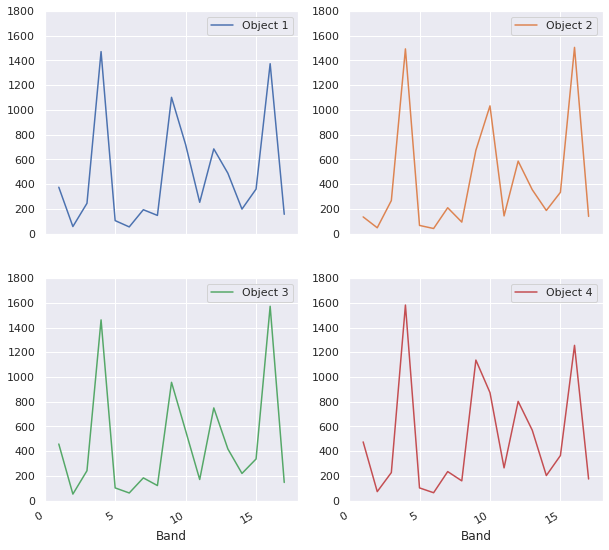

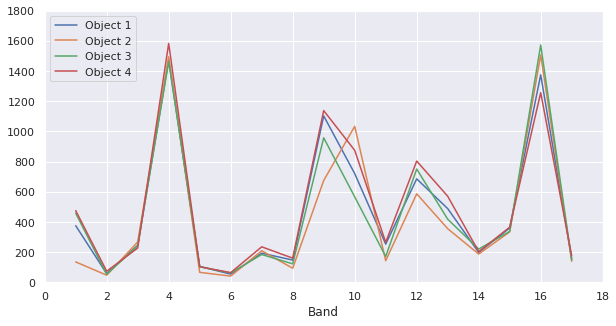

In [7]:
data.plot(
    figsize=(10,10), subplots=True, layout=(2,2), xlim=[0, 18], ylim=[0,1800])
plt.show()
data.plot(figsize=(10,5), xlim=[0, 18], ylim=[0,1800])
plt.show()

Appliying Fourier transform to our dataset and visaulizing it

In [8]:
data_fft = data.apply(nf.fft, axis=0).apply(nf.fftshift, axis=0)

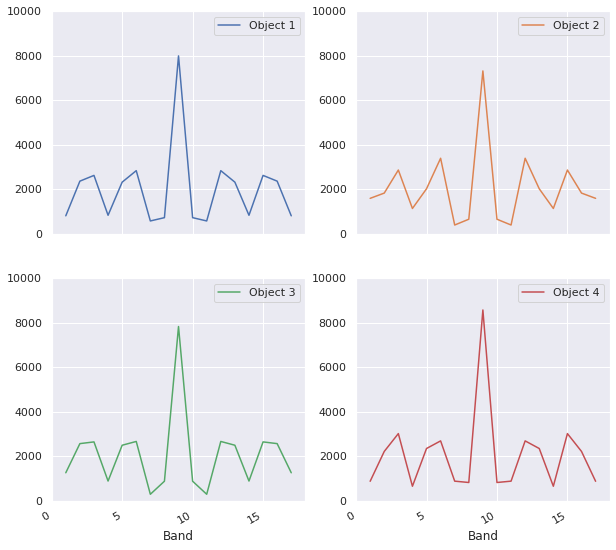

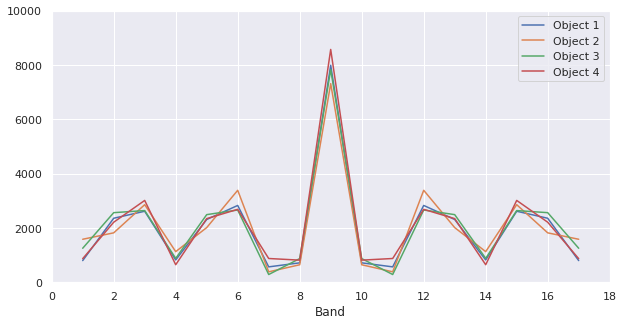

In [9]:
data_fft.abs().plot(
    figsize=(10,10), subplots=True, layout=(2,2), xlim=[0, 18], ylim=[0,10000])
plt.show()
data_fft.abs().plot(figsize=(10,5), xlim=[0, 18], ylim=[0,10000])
plt.show()

## Preparing for PCA

Our dataset is composed by 4 sample sets of 17 bands, each band is a feature and each sample is corresponding to an object so the real dataset that we need to explore consist of 4 sample sets of 17 features each with each sample set characterizing a celestial object.

In [10]:
data = pd.read_csv("./data.csv", index_col="Band")
data.index = [f"Band {i}" for i in data.index]
data = data.transpose()
data

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
Object 1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Object 2,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Object 3,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Object 4,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


In [11]:
data.describe()

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
count,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
mean,360.750000,57.500000,245.25,1502.500000,94.250000,55.250000,205.250000,130.500000,967.500000,798.250000,208.000000,706.000000,457.750000,202.000000,349.000000,1427.000000,154.25000
std,156.712848,11.120552,16.50,54.659552,18.856917,10.436315,22.366269,29.557853,210.612599,200.755863,60.188592,93.427334,92.471167,13.735599,15.769168,140.612944,15.47848
min,135.000000,47.000000,227.00,1462.000000,66.000000,41.000000,184.000000,93.000000,674.000000,566.000000,143.000000,586.000000,355.000000,187.000000,334.000000,1256.000000,139.00000
25%,315.000000,51.500000,238.25,1469.500000,93.750000,50.750000,190.750000,114.750000,886.250000,681.500000,164.000000,660.250000,402.250000,195.250000,336.250000,1344.500000,145.00000
50%,416.500000,55.000000,243.50,1483.000000,103.000000,58.000000,201.000000,134.500000,1029.500000,797.000000,212.000000,717.500000,453.000000,200.500000,348.500000,1440.000000,151.50000
75%,462.250000,61.000000,250.50,1516.000000,103.500000,62.500000,215.500000,150.250000,1110.750000,913.750000,256.000000,763.250000,508.500000,207.250000,361.250000,1522.500000,160.75000
max,475.000000,73.000000,267.00,1582.000000,105.000000,64.000000,235.000000,160.000000,1137.000000,1033.000000,265.000000,803.000000,570.000000,220.000000,365.000000,1572.000000,175.00000


Now we have defined that each band is a feture we can start preprocesing our dataset

In [12]:
from sklearn.preprocessing import StandardScaler as Scaler
scaler=Scaler()
scaler.fit(data.values)
scaled_data = scaler.transform(data.values)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [13]:
scaled_data

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
Object 1,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
Object 2,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656
Object 3,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
Object 4,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958


## Appliying PCA

Now thar we have scaled our data witout altering its shape we can apply our pca analysis

In [14]:
from sklearn.decomposition import PCA

n = 4
pca = PCA(n_components=n)
pca.fit(scaled_data.values) 
pca_data = pca.transform(scaled_data.values)
pca_data = pd.DataFrame(
    pca_data, columns=[f"PC {i}" for i in range(1, n+1)], index=data.index)

In [15]:
pca_data

,PC 1,PC 2,PC 3,PC 4
Object 1,-0.954490,0.328318,1.829829,-6.668701e-16
Object 2,4.987462,-1.826611,-0.283270,-1.917519e-15
Object 3,0.487978,3.233672,-0.765148,3.863638e-15
Object 4,-4.520951,-1.735380,-0.781412,-1.341836e-15


With the values in `pca.explained_variance_ratio_` we can see how much is the contribution of each PC to the todal variance

In [16]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[0:2])*100)

[6.83278713e-01 2.48712884e-01 6.80084029e-02 2.68157422e-32]
93.19915970724625


Here we see that `PC 1` and `PC 2` contributes with 93% of the total variance, so we wil plot this data

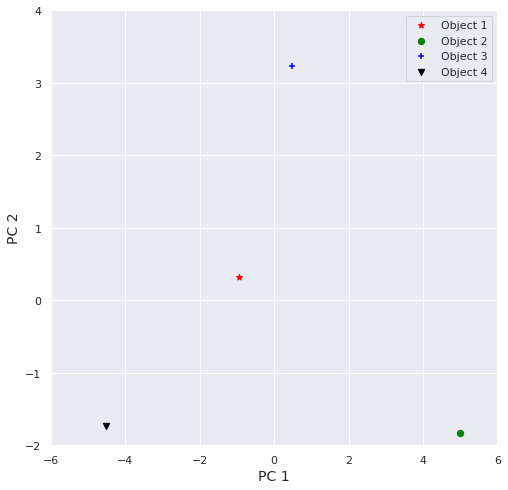

In [17]:
sns.set_style("darkgrid")

colors = ["red", "green", "blue", "black"]
colors = dict(zip(pca_data.index, colors))
markers = ["*", "o", "+", "v"]
markers = dict(zip(pca_data.index, markers))

fig, ax=plt.subplots(figsize=(8, 8))
for label, row in pca_data.iterrows():
    ax.scatter(
        row["PC 1"], row["PC 2"], label=label, c=colors[label],
        marker=markers[label], s=40
    )

ax.set_xlim(-6, 6)
ax.set_xlabel("PC 1", fontsize=14)
ax.set_ylim(-2, 4)
ax.set_ylabel("PC 2", fontsize=14)
ax.legend()

plt.show()

From the above plot we see that PC 1 and PC 2 are almos linearly realted for objects 1, 3 and 4 but object is outside this relation. The correlation matrix in the "objects space" show that object 2 has a negative correlation with respect to the others objects.

In [18]:
pca_data[["PC 1", "PC 2"]].transpose().corr().style.background_gradient(
    cmap='viridis')

,Object 1,Object 2,Object 3,Object 4
Object 1,1.000000,-1.000000,1.000000,1.000000
Object 2,-1.000000,1.000000,-1.000000,-1.000000
Object 3,1.000000,-1.000000,1.000000,1.000000
Object 4,1.000000,-1.000000,1.000000,1.000000


From the PCA and the analysis from the data we can conclude that the object 2 behaves different from the other objects, so, from the statement of the problem, this is a planet not a star!

## Answer

**Object 2 is not a star but planet!**

## What about clustering?

I will try to use the data from PCA to cluster the objects with methods from few samples (in this case, very few samples)

### Affinity Propagation method

Just for testign we will use defaults options

In [19]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [20]:
clusterer = AffinityPropagation()
clusterer.fit(pca_data.values)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [21]:
# cluster centers indices
cci = clusterer.cluster_centers_indices_
# number of clusters
nc = len(cci)
# labels
labels = clusterer.labels_
# Silhouette Coefficient 
sc = metrics.silhouette_score(pca_data.values, labels, metric='euclidean')

In [22]:
print(f"Estimated number of clusters: {nc}")
print(f"Silhouette Coefficient: {sc:.4f}")

Estimated number of clusters: 2
Silhouette Coefficient: 0.2175


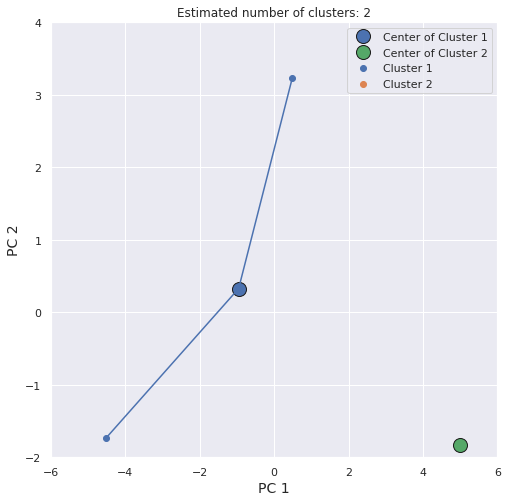

In [23]:
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle('bgrcmyk')

fig, ax = plt.subplots(figsize=(8, 8))
for index, color in zip(range(nc), colors):
    class_members = labels == index
    coc_x, coc_y, *_ = pca_data.values[cci[index]]
    
    ax.scatter(
        pca_data.values[class_members, 0], pca_data.values[class_members, 1], 
        label=f"Cluster {index + 1}"
    )
    ax.plot(
        coc_x, coc_y, 'o', markerfacecolor=color, markeredgecolor='k', 
        markersize=14, label=f"Center of Cluster {index + 1}"
    )
    
    for x, y, *_ in pca_data.values[class_members]:
        ax.plot([coc_x, x], [coc_y, y], color)

ax.set_title(f"Estimated number of clusters: {nc}")
ax.set_xlim(-6, 6)
ax.set_xlabel("PC 1", fontsize=14)
ax.set_ylim(-2, 4)
ax.set_ylabel("PC 2", fontsize=14)
ax.legend()

plt.show()

As we can see, Affinity propagation method give us two clusters with Object 2 alone!

### MeanShift method

As in the previous case, we will use defaults options

In [24]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

Just to get a non null bandwith we use 0.5 quantile

In [25]:
bandwidth = estimate_bandwidth(pca_data.values, quantile=0.5, n_samples=4)
bandwidth

4.96268264792928

In [26]:
clusterer = MeanShift(bandwidth=bandwidth)
clusterer.fit(pca_data.values)

MeanShift(bandwidth=4.96268264792928, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [27]:
# cluster centers
cc = clusterer.cluster_centers_
# number of clusters
nc = len(cc)
# labels
labels = clusterer.labels_
# Silhouette Coefficient 
sc = metrics.silhouette_score(pca_data.values, labels, metric='euclidean')

In [28]:
print(f"Estimated number of clusters: {nc}")
print(f"Silhouette Coefficient: {sc:.4f}")

Estimated number of clusters: 2
Silhouette Coefficient: 0.2175


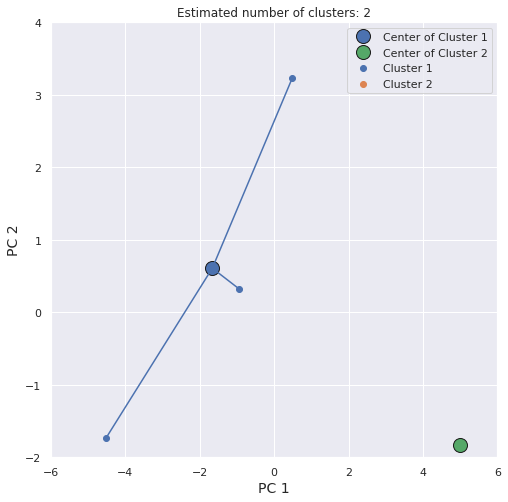

In [29]:
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle('bgrcmyk')

fig, ax = plt.subplots(figsize=(8, 8))
for index, color in zip(range(nc), colors):
    class_members = labels == index
    coc_x, coc_y, *_ = cc[index]
    
    ax.scatter(
        pca_data.values[class_members, 0],  pca_data.values[class_members, 1], 
        label=f"Cluster {index + 1}"
    )
    ax.plot(
        coc_x, coc_y, 'o', markerfacecolor=color, markeredgecolor='k', 
        markersize=14, label=f"Center of Cluster {index + 1}"
    )
    for x, y, *_ in pca_data.values[class_members]:
        ax.plot([coc_x, x], [coc_y, y], color)

ax.set_title(f"Estimated number of clusters: {nc}")
ax.set_xlim(-6, 6)
ax.set_xlabel("PC 1", fontsize=14)
ax.set_ylim(-2, 4)
ax.set_ylabel("PC 2", fontsize=14)
ax.legend()

plt.show()

Again, we have two clusters with Object 2 alone! But now with Mean Shift method.

## Confirm the answer

**Object 2 is not a star but planet!**